# Project 1: FMNIST

## Get data

The first step is to download the dataset from the sklearn collection.

Then we are going to split the dataset into an `X` matrix with atributes, and an array `y` with labels.

[video: demo](https://jtl.mx/v/6804d1bf-91fa-4d0d-85d0-adbd953c8ec1)

In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.datasets import fetch_openml
fmnist = fetch_openml('Fashion-MNIST', version=1)
fmnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = fmnist['data'], fmnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

## Data pre-processing

We are going to take a look at the dataset.

Then we're going to make some transformations.

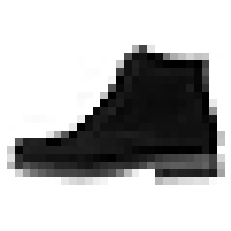

In [10]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

any_number = X.iloc[42].to_numpy()
any_number_image = any_number.reshape(28, 28)

plt.imshow(any_number_image, cmap = 'binary')
plt.axis("off")
plt.show()

In [11]:
y[42]

'9'

### Cast label string to int

In [12]:
import numpy as np

y = y.astype(np.uint8)
y[42]

9

### Split dataset

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Scaling inputs

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

## Stochastic gradient descent learning

### Model creation

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)

### Model training (with historical data)

In [16]:
sgd_clf.fit(X_train_scaled, y_train)
sgd_clf.predict([any_number])

array([9], dtype=uint8)

### Model evaluation

In [17]:
from sklearn.metrics import accuracy_score

# Accuracy
sgd_predictions = sgd_clf.predict(X_test_scaled)

accuracy_score(y_test, sgd_predictions)

0.8265

### Cross-Validation

In [18]:
# out of the box
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.80983803, 0.79507951, 0.81038104])

### Confusion Matrix

In [19]:
# Get predictions
from sklearn.model_selection import cross_val_predict

y_test_pred_sgd = cross_val_predict(sgd_clf, X_test_scaled, y_test, cv=3)

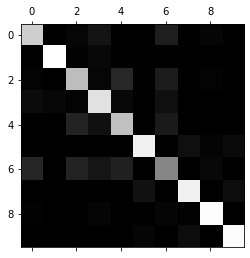

In [20]:
# Let's create a Confussion matrix
from sklearn.metrics import confusion_matrix

sgd_conf_mx = confusion_matrix(y_test, y_test_pred_sgd)
plt.matshow(sgd_conf_mx, cmap = plt.cm.gray)
plt.show()

## Logistic regression learning

### Model creation

In [21]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 42)

### Model training (with historical data)

In [22]:
lr_clf.fit(X_train_scaled, y_train)
lr_clf.predict([any_number])

array([9], dtype=uint8)

### Model evaluation

In [24]:
# Accuracy
lr_predictions = lr_clf.predict(X_test_scaled)

accuracy_score(y_test, lr_predictions)

0.8434

### Cross-Validation

In [25]:
cross_val_score(lr_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.80263947, 0.7869787 , 0.78757876])

### Confusion Matrix

In [26]:
y_test_pred_lr = cross_val_predict(lr_clf, X_test_scaled, y_test, cv=3)

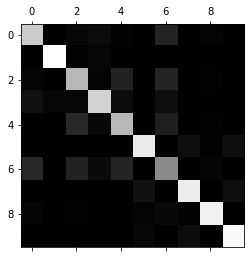

In [27]:
lr_conf_mx = confusion_matrix(y_test, y_test_pred_lr)
plt.matshow(lr_conf_mx, cmap = plt.cm.gray)
plt.show()

## Passive Aggressive Classifier learning

### Model creation

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier(random_state = 42)

### Model training (with historical data)

In [35]:
pa_clf.fit(X_train_scaled, y_train)
pa_clf.predict([any_number])

array([9], dtype=uint8)

### Model evaluation

In [37]:
# Accuracy
pa_predictions = pa_clf.predict(X_test_scaled)

accuracy_score(y_test, pa_predictions)

0.7978

### Cross-Validation

In [39]:
cross_val_score(pa_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.78854229, 0.76567657, 0.77437744])

### Confusion Matrix

In [40]:
y_test_pred_pa = cross_val_predict(pa_clf, X_test_scaled, y_test, cv=3)

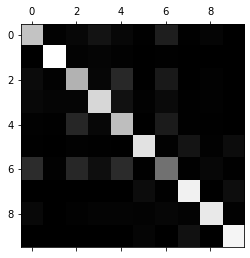

In [41]:
pa_conf_mx = confusion_matrix(y_test, y_test_pred_pa)
plt.matshow(pa_conf_mx, cmap = plt.cm.gray)
plt.show()

## Perceptron learning

### Model creation

In [42]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state = 42)

### Model training (with historical data)

In [43]:
per_clf.fit(X_train_scaled, y_train)
per_clf.predict([any_number])

array([9], dtype=uint8)

### Model evaluation

In [44]:
# Accuracy
per_predictions = per_clf.predict(X_test_scaled)

accuracy_score(y_test, per_predictions)

0.7869

### Cross-Validation

In [45]:
cross_val_score(per_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.78164367, 0.77227723, 0.76747675])

### Confusion Matrix

In [46]:
y_test_pred_per = cross_val_predict(per_clf, X_test_scaled, y_test, cv=3)

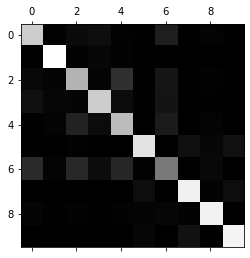

In [47]:
per_conf_mx = confusion_matrix(y_test, y_test_pred_per)
plt.matshow(per_conf_mx, cmap = plt.cm.gray)
plt.show()

## Ridge Classifier learning

### Model creation

In [48]:
from sklearn.linear_model import RidgeClassifier

rid_clf = RidgeClassifier(random_state = 42)

### Model training (with historical data)

In [49]:
rid_clf.fit(X_train_scaled, y_train)
rid_clf.predict([any_number])

array([9], dtype=uint8)

### Model evaluation

In [50]:
# Accuracy
rid_predictions = rid_clf.predict(X_test_scaled)

accuracy_score(y_test, rid_predictions)

0.8117

### Cross-Validation

In [51]:
cross_val_score(rid_clf, X_test_scaled, y_test, cv=3, scoring='accuracy')

array([0.80113977, 0.77947795, 0.79237924])

### Confusion Matrix

In [52]:
y_test_pred_rid = cross_val_predict(rid_clf, X_test_scaled, y_test, cv=3)

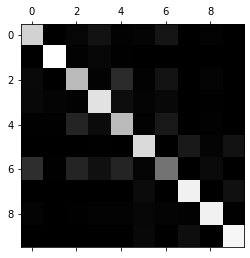

In [53]:
rid_conf_mx = confusion_matrix(y_test, y_test_pred_rid)
plt.matshow(rid_conf_mx, cmap = plt.cm.gray)
plt.show()

## Results

Results              | SGDClassifier                        | LogisticRegression                    | PassiveAggressiveClassifier           | Perceptron                            | RidgeClassifier           | 
:--------------------| :------------------------------------| :-------------------------------------| :-------------------------------------| :-------------------------------------| :-------------------------|
Accuracy             | 0.8265                               | 0.8434                                | 0.7978                                | 0.7869                                | 0.8117                                |
Cross-Validation     | 0.80983803, 0.79507951, 0.81038104   | 0.80263947, 0.7869787 , 0.78757876    | 0.78854229, 0.76567657, 0.77437744    | 0.78164367, 0.77227723, 0.76747675    | 0.80113977, 0.77947795, 0.79237924    |